<a href="https://colab.research.google.com/github/Neha-X-code/AI-powered-Customer-Retention-System-for-Financial-Institutions/blob/main/Customer_Retention_System_for_Financial_Institutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/Churn_modelling.csv')

In [3]:
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       100 non-null    int64  
 1   credit_score      100 non-null    int64  
 2   country           100 non-null    object 
 3   gender            100 non-null    object 
 4   age               100 non-null    int64  
 5   tenure            100 non-null    int64  
 6   balance           100 non-null    float64
 7   products_number   100 non-null    int64  
 8   credit_card       100 non-null    int64  
 9   active_member     100 non-null    int64  
 10  estimated_salary  100 non-null    float64
 11  churn             100 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 9.5+ KB


In [7]:
dataset.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.569311e+07,638.850000,37.990000,5.200000,70570.107200,1.640000,0.640000,0.520000,103169.445600,0.200000
std,6.944254e+04,114.114188,10.194567,2.994945,62472.524066,0.659354,0.482418,0.502117,55470.560188,0.402015
min,1.556898e+07,376.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1643.110000,0.000000
25%,1.563286e+07,549.750000,31.750000,3.000000,0.000000,1.000000,0.000000,0.000000,62852.147500,0.000000
50%,1.570012e+07,645.500000,36.500000,5.000000,84559.780000,2.000000,1.000000,1.000000,105481.725000,0.000000
75%,1.575494e+07,730.500000,43.250000,8.000000,125286.645000,2.000000,1.000000,1.000000,147402.005000,0.000000
max,1.581252e+07,850.000000,75.000000,10.000000,178718.190000,4.000000,1.000000,1.000000,198059.160000,1.000000


In [8]:
dataset= dataset.drop(columns = ['customer_id'])

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      100 non-null    int64  
 1   country           100 non-null    object 
 2   gender            100 non-null    object 
 3   age               100 non-null    int64  
 4   tenure            100 non-null    int64  
 5   balance           100 non-null    float64
 6   products_number   100 non-null    int64  
 7   credit_card       100 non-null    int64  
 8   active_member     100 non-null    int64  
 9   estimated_salary  100 non-null    float64
 10  churn             100 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 8.7+ KB


In [10]:
dataset= pd.get_dummies(data=dataset,drop_first=True)

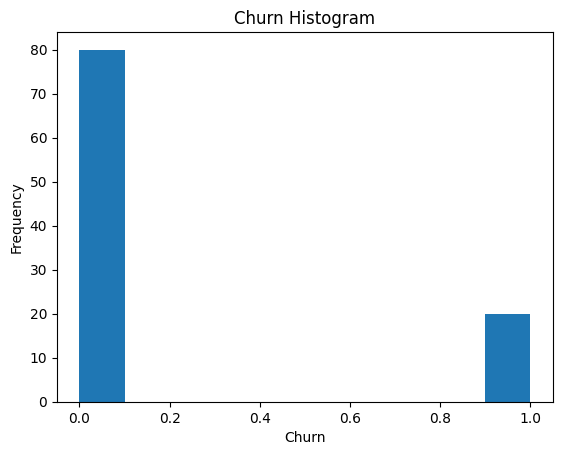

In [12]:
dataset['churn'].plot.hist()
plt.title('Churn Histogram')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

In [14]:
num_churned = (dataset['churn'] == 1).sum()
print(f'Number of customers who have churned: {num_churned}')

Number of customers who have churned: 20


In [15]:
dataset_2 = dataset.drop(columns='churn')

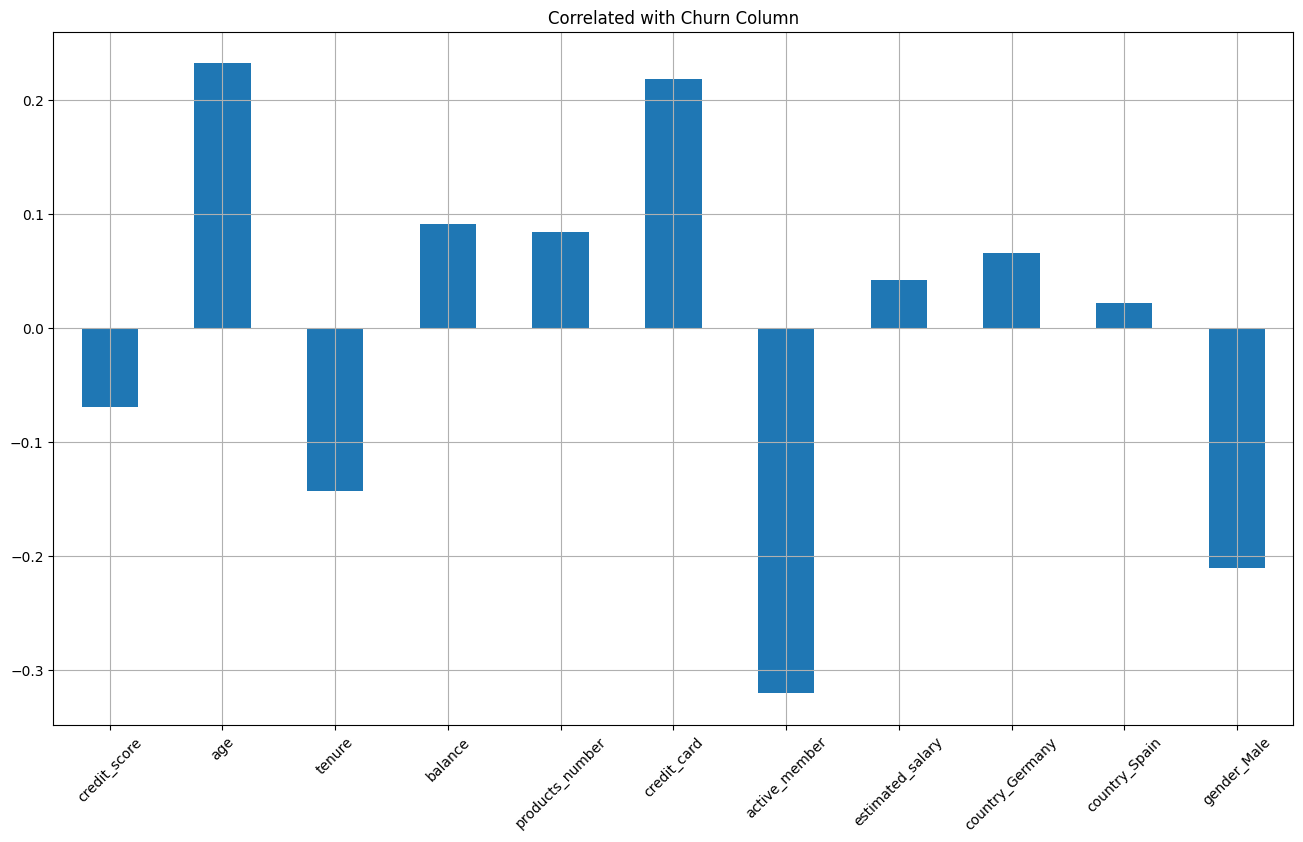

In [16]:
dataset_2 = dataset.drop(columns='churn')
correlation = dataset_2.corrwith(dataset['churn'])
correlation.plot.bar(figsize=(16, 9), title='Correlated with Churn Column', rot=45, grid=True)
plt.show()

In [17]:
corr=dataset.corr()

<Axes: >

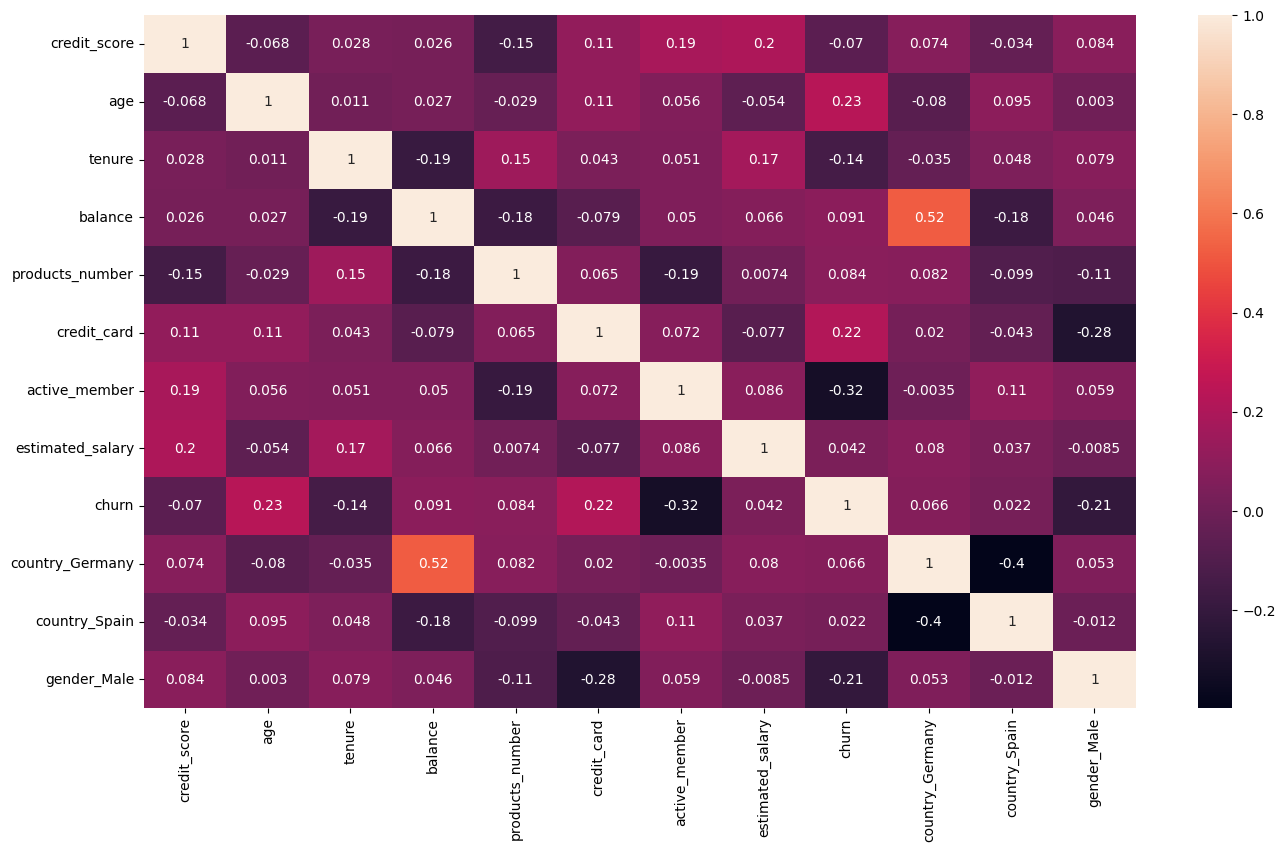

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [19]:
X = dataset.drop(columns='churn')
y = dataset['churn']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_test.shape

(20, 11)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [23]:
X_train

array([[ 1.69783586,  1.00787852, -1.10714226,  1.08571648, -1.04257207,
        -1.25723711, -1.07803625,  1.72464701, -0.6352234 , -0.61588176,
        -1.02532046],
       [-0.80056185, -0.5297669 , -1.44011737, -0.17179592,  0.62554324,
        -1.25723711, -1.07803625,  1.43872972, -0.6352234 ,  1.62368828,
         0.97530483],
       [ 0.48893375,  0.04685013, -1.44011737, -1.10828928,  0.62554324,
        -1.25723711, -1.07803625, -0.12186881, -0.6352234 , -0.61588176,
        -1.02532046],
       [ 1.50978442, -0.91417826,  0.2247582 , -1.10828928, -1.04257207,
         0.79539491, -1.07803625, -1.22150035, -0.6352234 , -0.61588176,
         0.97530483],
       [ 1.17845569, -0.62586974, -0.44119203,  0.71880759,  0.62554324,
         0.79539491,  0.92761259,  0.47853557,  1.5742493 , -0.61588176,
        -1.02532046],
       [-0.845336  , -0.0492527 , -1.10714226,  0.61812377, -1.04257207,
        -1.25723711,  0.92761259, -0.17602138,  1.5742493 , -0.61588176,
         0.975

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [25]:
y_pred= clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [27]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [28]:
results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.65,0.222222,1.0,0.125


In [29]:
print(confusion_matrix(y_test,y_pred))

[[12  0]
 [ 7  1]]


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
X = dataset.drop(columns='churn')
y = dataset['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

RF_results = pd.DataFrame([['Random Forest Classifier', acc, f1, prec, rec]],
                          columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
results = pd.DataFrame()  # Initialize an empty DataFrame if not already existing
results = pd.concat([results, RF_results], ignore_index=True)
print(results)

                      Model  Accuracy        F1  Precision  Recall
0  Random Forest Classifier      0.75  0.545455        1.0   0.375


In [32]:
print(confusion_matrix(y_test,y_pred))

[[12  0]
 [ 5  3]]


In [42]:
single_obs=[[647,40,3,85000.45,2,0,0,92012.45,0,1,1]]
clf.predict(scaler.fit_transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])